<a href="https://colab.research.google.com/github/Zhenyu0521/Machine-Learning/blob/master/Digits_Classification_Zhenyu_Fan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digits Classification
In this notebook, I applied different model to classify digits (built-in dataset in Python). Most importantly, I used different methods to measure the accuracy of various models.
*   **Precision**:  Measures the fraction of actual positives among those examples that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*  ** Recall**:  Measures the fraction of actual positives that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*   **F1-score**:  Weighted average of recall and precision


* **AUC**:  AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples (http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html)

* **False Positive Rat**e:  The false positive rate (FPR) measures the false alarm rate or the fraction of actual negatives that are predicted as positive. The range is 0 to 1. A smaller value indicates better predictive accuracy. (http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html)

## Ingest

In [0]:
import pandas as pd
import numpy as np
import warnings
import hypertools as hyp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, svm, metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

In [0]:
digits = load_digits()

## Exploratory Data Analysis

### Basic Information of Digits Dataset

In [0]:
print("The type of this dataset is %s" % type(digits))
print("The keys of this dataset are %s" % digits.keys())

print("The shape of this dataset images is {0}".format(digits.images.shape))
print("The shape of this dataset data is {0}".format(digits.data.shape))

The type of this dataset is <class 'sklearn.utils.Bunch'>
The keys of this dataset are dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
The shape of this dataset images is (1797, 8, 8)
The shape of this dataset data is (1797, 64)


### Basic Outline of Digits

<Figure size 576x396 with 0 Axes>

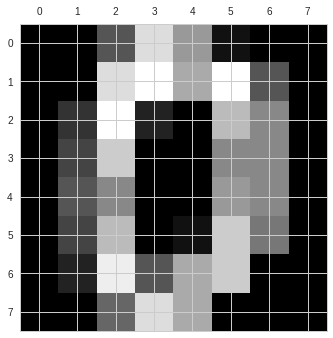

In [0]:
plt.gray() 
plt.matshow(digits.images[0]) 

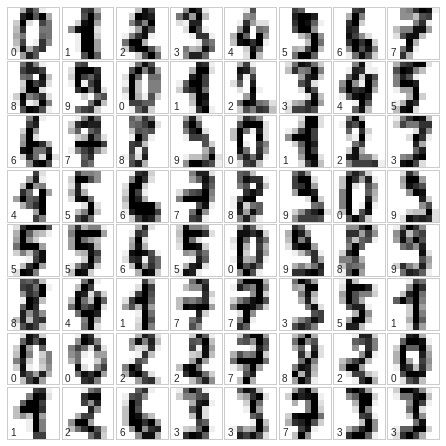

In [0]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

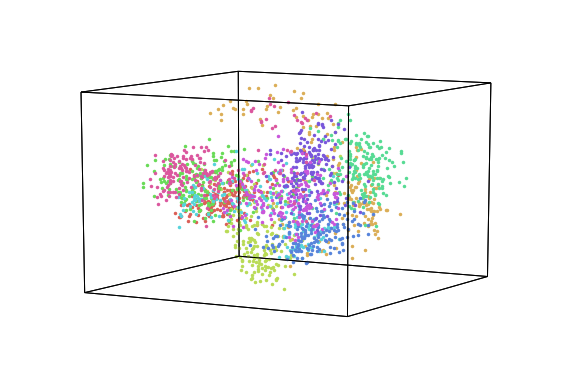

In [0]:
data = digits.data
hue = digits.target
hyp.plot(data, '.', hue=hue)

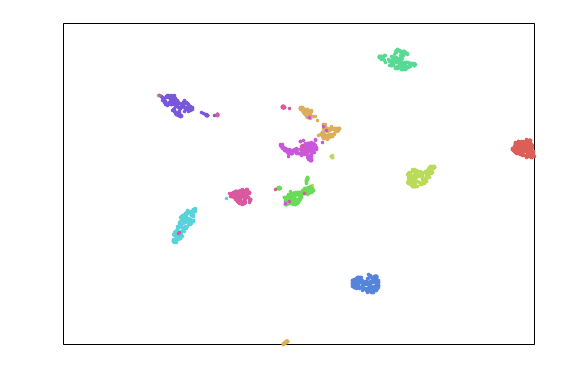

In [0]:
hue = digits.target.astype('str')
hyp.plot(data, '.', reduce='UMAP', hue=hue, ndims=2)

The last plot actually shows that every specific digit has their own characteristics, which means they can be distinguished and clustered easily. A really good start to do classification

## Build up Classification Model

In [0]:
X = digits.data
y = digits.target

### Logistic Regression

Conduct Grid Research to Find Best Test Size and Random State

In [0]:
warnings.filterwarnings('ignore')

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)

grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            log = LogisticRegression()
            log.fit(X_train, y_train)
            y_train_pred = log.predict(X_train)
            y_test_pred = log.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Train', 3:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue
grid_frame.head()

,Test Size,Random State,MSE of Train,MSE of Test
0,0.1,0,0.223253,1.116667
1,0.1,1,0.092146,0.416667
2,0.1,2,0.176252,1.711111
3,0.1,3,0.283859,0.772222
4,0.1,4,0.189858,1.000000


In [0]:
grid_frame_best = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
grid_frame_best

,Test Size,Random State,MSE of Train,MSE of Test
42,0.1,42,0.2282,0.083333


#### ConfusionMatrix

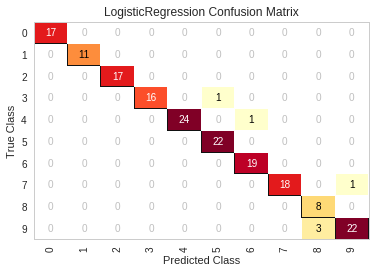

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# LogisticRegression
model_log = LogisticRegression()
# ConfusionMatrix
cm = ConfusionMatrix(model_log, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

#### ROCAUC Method

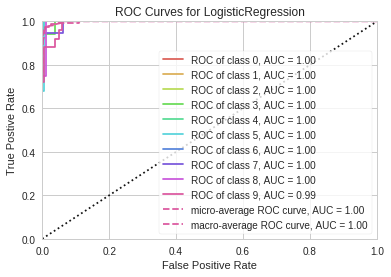

In [0]:
classes=[0,1,2,3,4,5,6,7,8,9]
visualizer = ROCAUC(model_log, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()            

#### Classification Report

In [0]:
model_log.fit(X_train, y_train)
predicted = model_log.predict(X_test)
expected = y_test
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      0.94      0.97        17
           4       1.00      0.96      0.98        25
           5       0.96      1.00      0.98        22
           6       0.95      1.00      0.97        19
           7       1.00      0.95      0.97        19
           8       0.73      1.00      0.84         8
           9       0.96      0.88      0.92        25

   micro avg       0.97      0.97      0.97       180
   macro avg       0.96      0.97      0.96       180
weighted avg       0.97      0.97      0.97       180



#### Visulization of Final Result

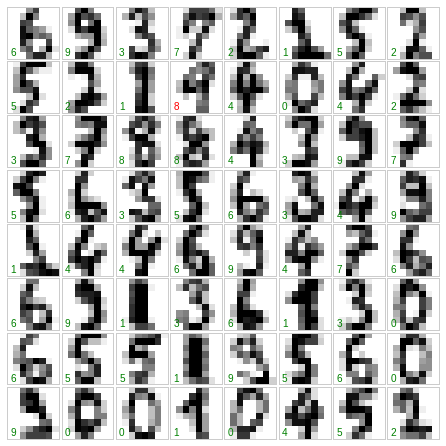

In [0]:
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

### SVC Model

#### ConfusionMatrix

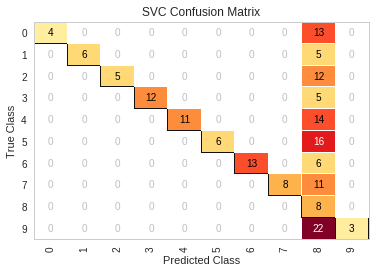

In [0]:
model_svc = svm.SVC()
cm = ConfusionMatrix(model_svc, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

#### ROCAUC Method

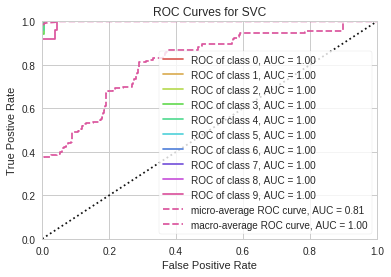

In [0]:
visualizer = ROCAUC(model_svc, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

#### Classification Report

In [0]:
model_svc.fit(X_train, y_train)
predicted = model_svc.predict(X_test)
expected = y_test
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.24      0.38        17
           1       1.00      0.55      0.71        11
           2       1.00      0.29      0.45        17
           3       1.00      0.71      0.83        17
           4       1.00      0.44      0.61        25
           5       1.00      0.27      0.43        22
           6       1.00      0.68      0.81        19
           7       1.00      0.42      0.59        19
           8       0.07      1.00      0.13         8
           9       1.00      0.12      0.21        25

   micro avg       0.42      0.42      0.42       180
   macro avg       0.91      0.47      0.52       180
weighted avg       0.96      0.42      0.52       180



#### Visualization of Final Result

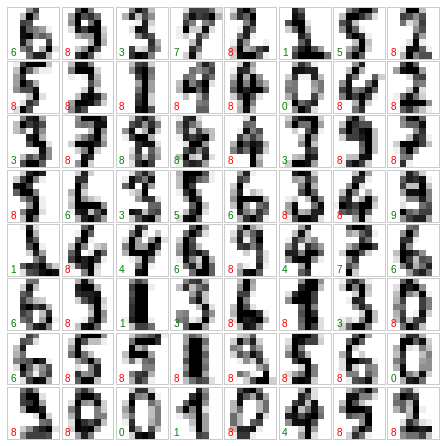

In [0]:
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

### Gaussian Naive Bayes Model

#### ConfusionMatrix

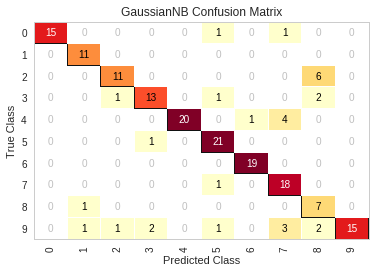

In [0]:
model_nb = GaussianNB()
cm = ConfusionMatrix(model_nb, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

#### ROCAUC Method

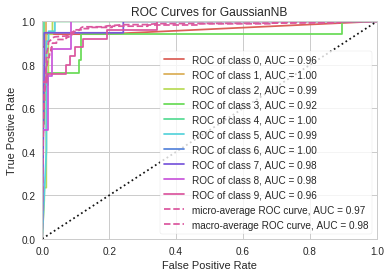

In [0]:
visualizer = ROCAUC(model_nb, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof() 

#### Classification Report

In [0]:
model_nb.fit(X_train, y_train)
predicted = model_nb.predict(X_test)
expected = y_test
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.85      1.00      0.92        11
           2       0.85      0.65      0.73        17
           3       0.81      0.76      0.79        17
           4       1.00      0.80      0.89        25
           5       0.84      0.95      0.89        22
           6       0.95      1.00      0.97        19
           7       0.69      0.95      0.80        19
           8       0.41      0.88      0.56         8
           9       1.00      0.60      0.75        25

   micro avg       0.83      0.83      0.83       180
   macro avg       0.84      0.85      0.82       180
weighted avg       0.87      0.83      0.84       180



#### Visualization of Final Result

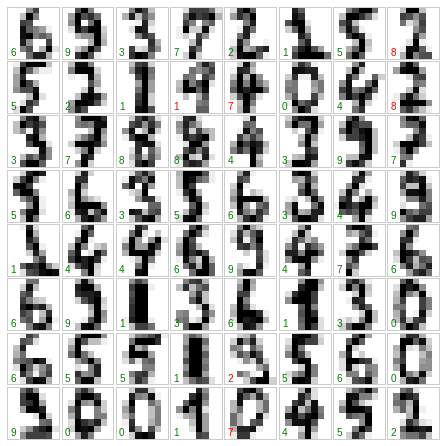

In [0]:
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

## Conclusion

Different measurements can provide various supports for models. And taking them all in consideration can help determine the final model.

Logistic regression can be determined as the final digits-classification model. Engineers can make use of it to design digits-classification software to help people transport what they write to computer efficiently. The same principle can also be applied in identifying words. However, to make the latter one happen, a larger dataset that contains as many as words is needed to make sure higher accuracy.